Задача 1 Даны значения величины заработной платы заемщиков банка (zp) и значения их
поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические
операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату
(то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая
переменная). Произвести расчет как с использованием intercept, так и без.

Решение

In [11]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

2.6205388824027653
444.17735732435955
[[444.17735732]
 [  2.62053888]]


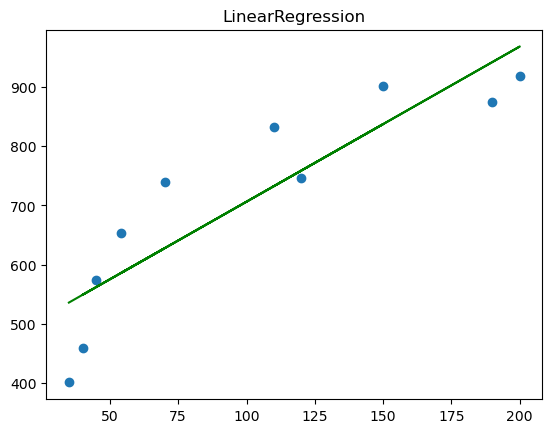

In [36]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])#x
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])#y
n = 10
b1 = (n * np.sum(zp * ks) - np.sum(zp) * np.sum(ks))/(n * np.sum(zp**2) - np.sum(zp)**2)
print(b1)
b0 = np.mean(ks) - b1*np.mean(zp)
print(b0)
y_pred = b0 + b1 * zp

#Произведём расчёты без использования intercept, в матричной форме:
x = zp.reshape((10, 1))
y = ks.reshape((10, 1))
X1 = np.hstack([np.ones((10, 1)), x])
B1 = np.dot(np.linalg.inv(np.dot(X1.T, X1)), X1.T @ y)
print(B1)
plt.scatter(zp,ks)
plt.plot (zp, y_pred, color="green")
plt.title('LinearRegression')
plt.show()

Задача 2 Посчитать коэффициент линейной регрессии при заработной плате (zp), используя
градиентный спуск (без intercept).

Решение

In [55]:
def mse_(B2, y = ks, x = zp, n = 10):
    return np.sum((B2 * x - y)**2)/n
alfa = 0.000001
B2 = 0.1
print(mse_(B2, ks, zp, n))
for i in range(2000):
    B2 -= alfa * (2 / n) * np.sum((B2 * zp - ks) * zp)
    if i % 100 == 0:
        print(f'{i} итерация: B2 = {B2}, mse = {mse_(B2)}')

518336.326
0 итерация: B2 = 0.25952808, mse = 493237.7212546963
100 итерация: B2 = 5.54537842245223, mse = 58151.31823171113
200 итерация: B2 = 5.868748638669329, mse = 56522.97550129376
300 итерация: B2 = 5.888531320728348, mse = 56516.88130936019
400 итерация: B2 = 5.8897415574471985, mse = 56516.85850140053
500 итерация: B2 = 5.889815595583751, mse = 56516.858416040064
600 итерация: B2 = 5.889820124983314, mse = 56516.85841572062
700 итерация: B2 = 5.889820402076462, mse = 56516.85841571941
800 итерация: B2 = 5.88982041902807, mse = 56516.8584157194
900 итерация: B2 = 5.889820420065112, mse = 56516.85841571941
1000 итерация: B2 = 5.8898204201285544, mse = 56516.85841571941
1100 итерация: B2 = 5.889820420132437, mse = 56516.85841571943
1200 итерация: B2 = 5.889820420132673, mse = 56516.85841571943
1300 итерация: B2 = 5.889820420132673, mse = 56516.85841571943
1400 итерация: B2 = 5.889820420132673, mse = 56516.85841571943
1500 итерация: B2 = 5.889820420132673, mse = 56516.85841571943


In [24]:
mse_(B2)

56516.85841571943

Коэфициент линейной регрессии после 1100 итераций B2 = 5.889820420132673

Задача 3 (Дополнительно) Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что
изменение коэффициентов должно производиться
на каждом шаге одновременно (то есть изменение одного коэффициента не должно
влиять на изменение другого во время одной итерации).

Решение

 интерсепт: 444.1773573243596
 коэффициент: [2.62053888]
[535.89621821 562.10160703 942.07974498 968.2851338  548.99891262
 627.61507909 585.68645697 837.25818968 758.64202321 732.43663439]


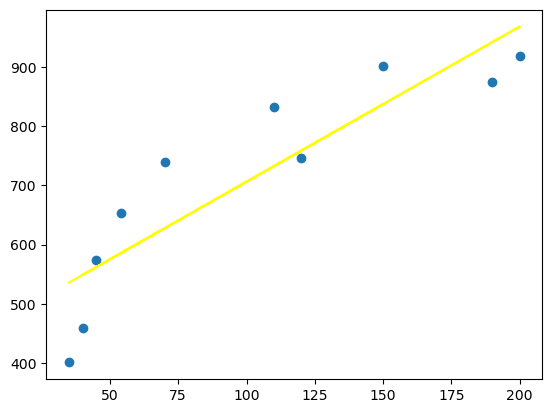

In [31]:
model = LinearRegression()
s = zp.reshape(-1,1)
model.fit(s, ks)
print(f' интерсепт: {model.intercept_}')
print(f' коэффициент: {model.coef_}')
y_pred2 = model.predict(s)
print(y_pred2)
plt.scatter(zp,ks)
plt.plot (s, y_pred2, color="yellow")
# plt.scatter(zp,y_pred2, -r)
plt.show()

In [32]:
model.score(s, ks)

0.7876386635293686

In [49]:
b0 = 0
b1 = 0

for i in range(1000):
    y_pred = b0 + b1 * zp
    mse = y_pred - ks
    b0 -= alfa * (2 / n )* np.sum(mse)
    b1 -= alfa * (2 / n) * np.sum(mse * zp)
    if i % 50 == 0:
        print(f'{i}:a = {b0} b = {b1}')

0:a = 0.0014198 b = 0.1622834
50:a = 0.0444146065738862 b = 4.4730069209062755
100:a = 0.06352701165264334 b = 5.53907267139291
150:a = 0.07673260602773584 b = 5.80266965016036
200:a = 0.08847711289407637 b = 5.867800050544907
250:a = 0.09986004853621308 b = 5.883845697519596
300:a = 0.11115334533167746 b = 5.887751704659264
350:a = 0.12242425760266858 b = 5.888655337607165
400:a = 0.13368941869388745 b = 5.888816424940228
450:a = 0.1449529423696694 b = 5.888793867471479
500:a = 0.15621584605168118 b = 5.888725892552282
550:a = 0.16747838137410798 b = 5.888646686571713
600:a = 0.1787406105765713 b = 5.888564704507622
650:a = 0.19000254905762862 b = 5.888482037445125
700:a = 0.2012642006311048 b = 5.8883992025513585
750:a = 0.2125255662456888 b = 5.888316327732066
800:a = 0.2237866461414637 b = 5.888233444620853
850:a = 0.2350474403832603 b = 5.8881505610413045
900:a = 0.2463079489925655 b = 5.888067678928305
950:a = 0.2575681719801466 b = 5.8879847987603595
